# Async Exercise: Health sites near you

In [84]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ph = gpd.read_file('gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [3]:
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [4]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


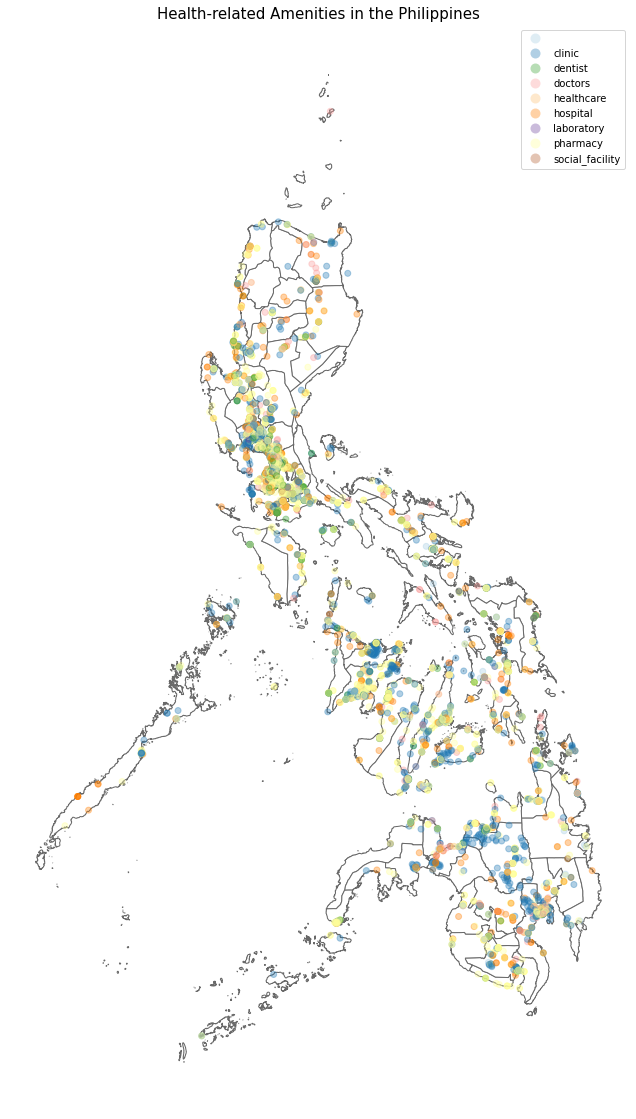

In [5]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

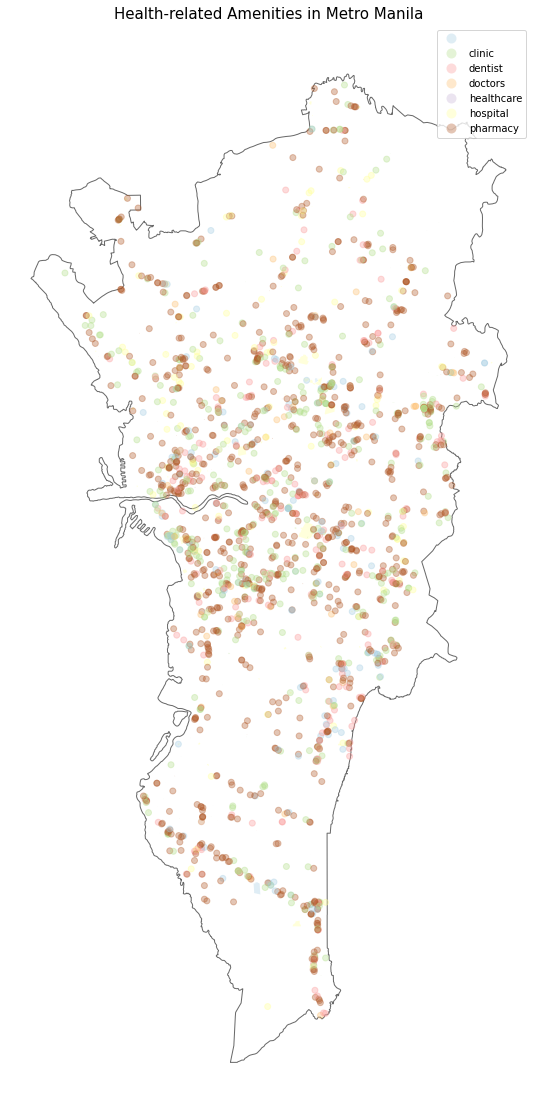

In [104]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm_healthsites = gpd.sjoin(healthsites, mm, op='within')
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metro Manila', fontsize=15)
ax.axis('off');

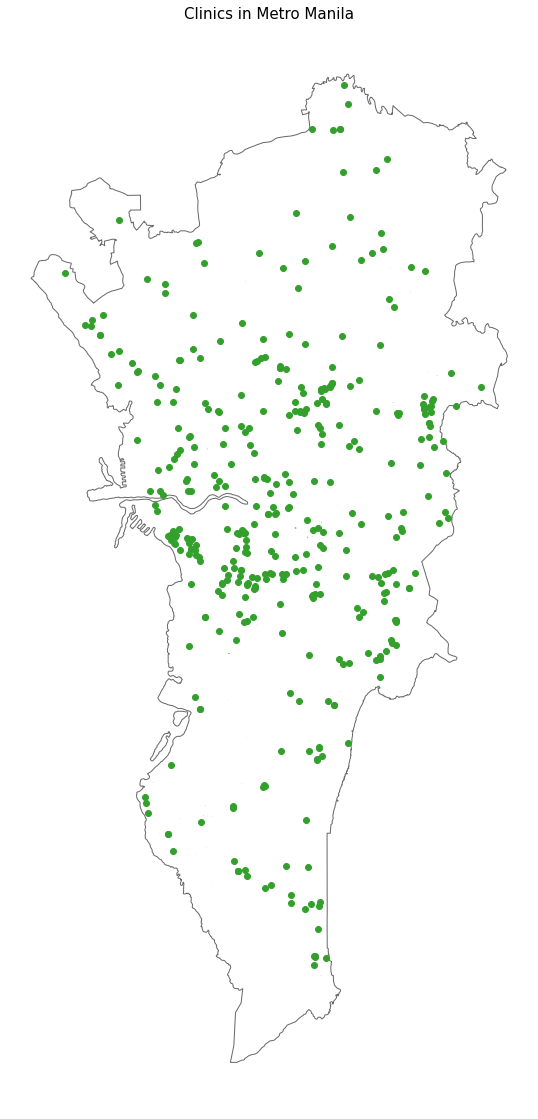

In [70]:
# Plot for Clinics in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_clinic = gpd.sjoin(healthsites[healthsites.amenity == "clinic"], mm, op='within')
mm_clinic.plot(ax=ax, color = "#33a02c")
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');

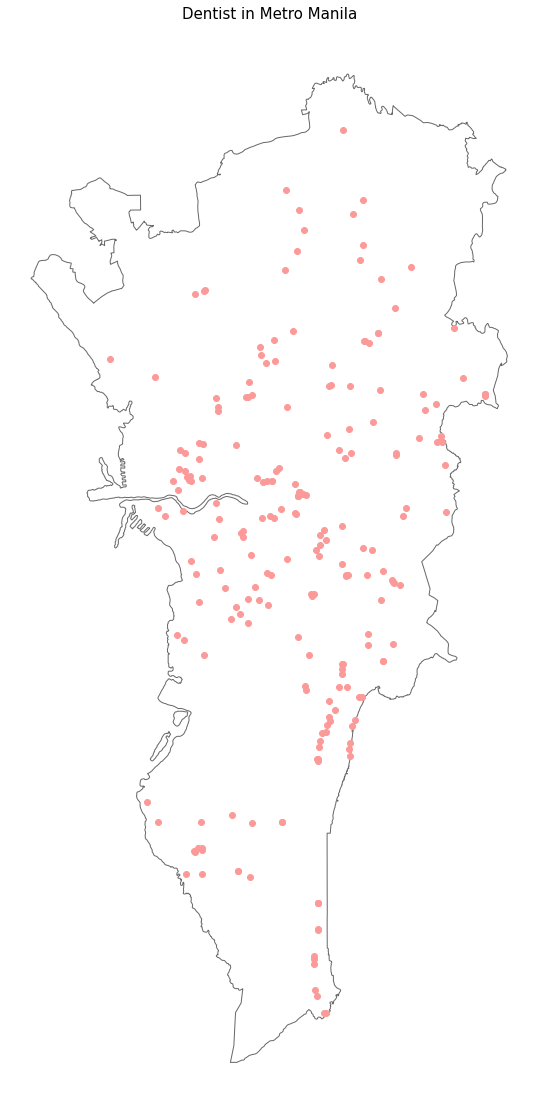

In [69]:
# Plot for Dentists in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_dentist = gpd.sjoin(healthsites[healthsites.amenity == "dentist"], mm, op='within')
mm_dentist.plot(ax=ax, color = "#fb9a99")
ax.set_title('Dentist in Metro Manila', fontsize=15)
ax.axis('off');

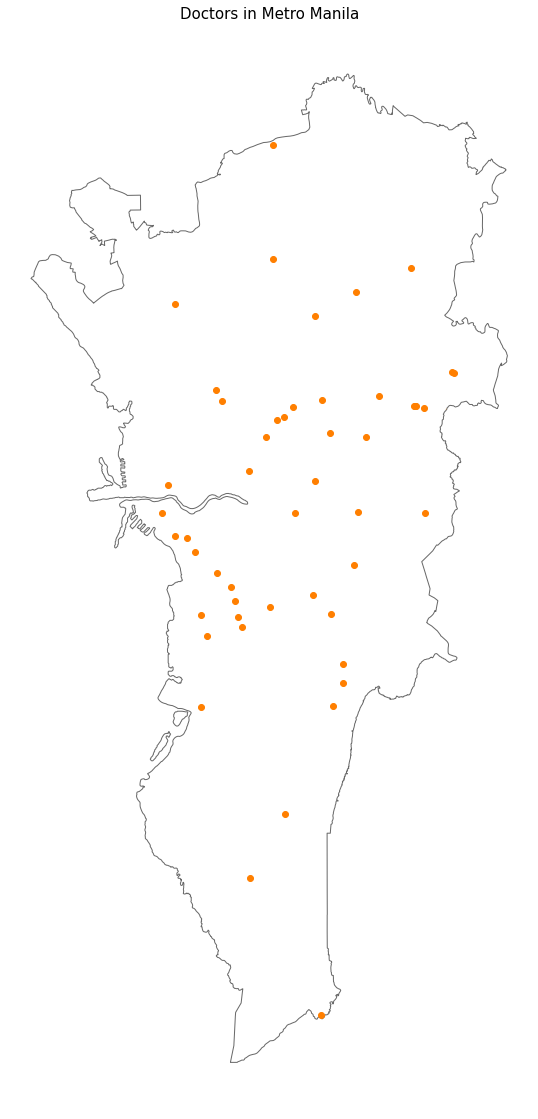

In [71]:
# Plot for Doctors in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_doctors = gpd.sjoin(healthsites[healthsites.amenity == "doctors"], mm, op='within')
mm_doctors.plot(ax=ax, color = "#ff7f00")
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');

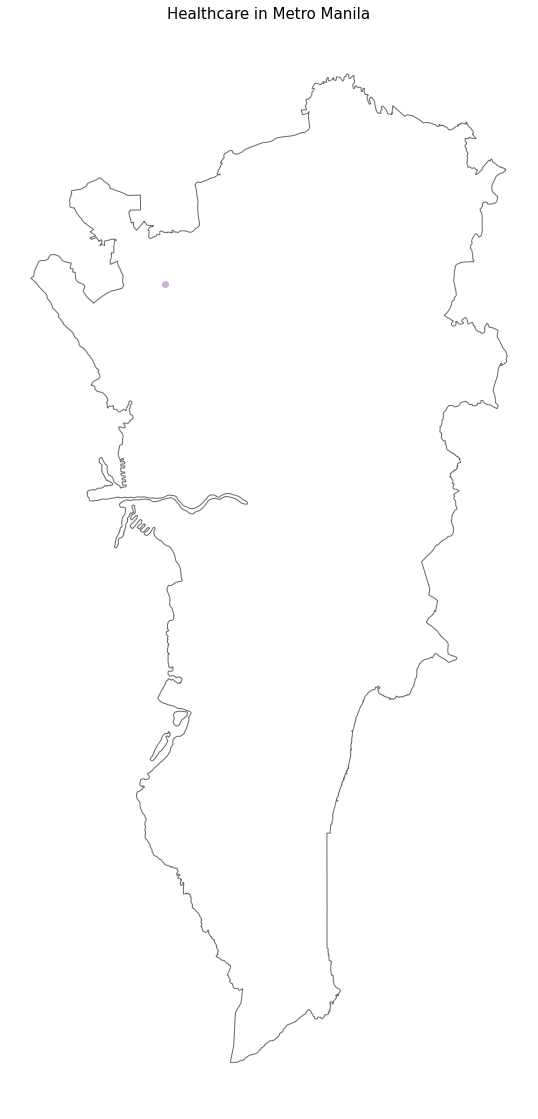

In [67]:
# Plot for Healthcare in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_healthcare = gpd.sjoin(healthsites[healthsites.amenity == "healthcare"], mm, op='within')
mm_healthcare.plot(ax=ax, color = "#cab2d6")
ax.set_title('Healthcare in Metro Manila', fontsize=15)
ax.axis('off');

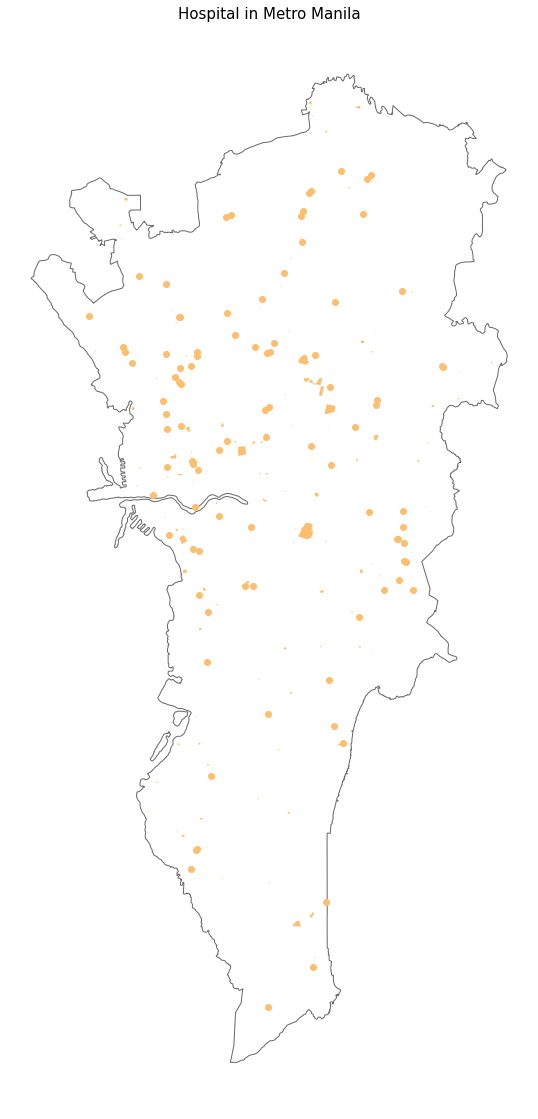

In [72]:
# Plot for Hospital in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_hospital = gpd.sjoin(healthsites[healthsites.amenity == "hospital"], mm, op='within')
mm_hospital.plot(ax=ax, color = "#fdbf6f")
ax.set_title('Hospital in Metro Manila', fontsize=15)
ax.axis('off');

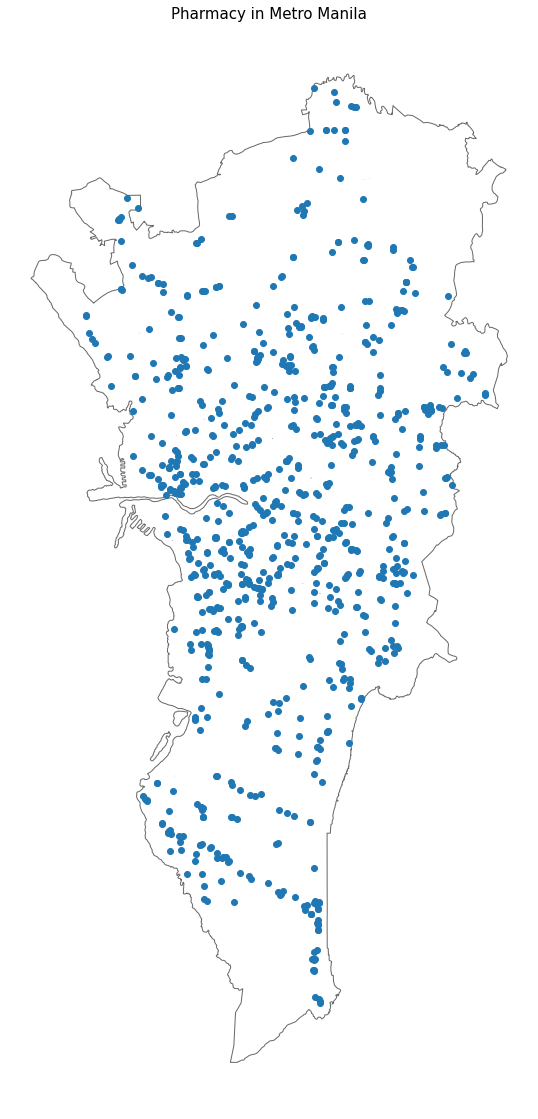

In [85]:
# Plot for Pharmacy in Metro Manila
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_pharmacy = gpd.sjoin(healthsites[healthsites.amenity == "pharmacy"], mm, op='within')
mm_pharmacy.plot(ax=ax, color = "#1f78b4")
ax.set_title('Pharmacy in Metro Manila', fontsize=15)
ax.axis('off');

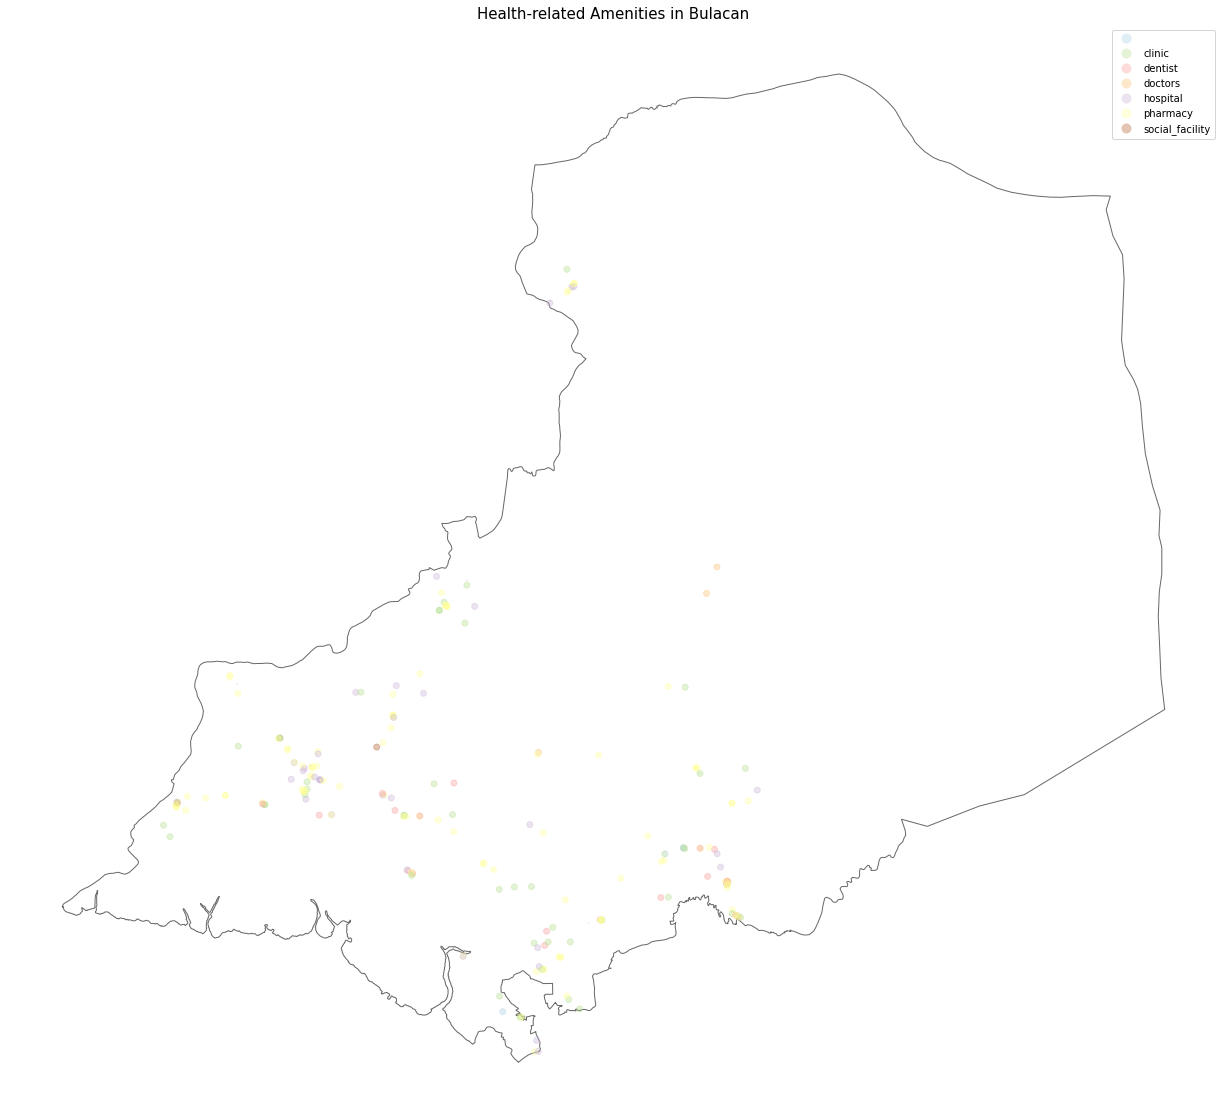

In [105]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
bulacan = ph[ph.NAME_1=="Bulacan"]
bulacan_healthsites = gpd.sjoin(healthsites, bulacan, op='within')
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Bulacan', fontsize=15)
ax.axis('off');

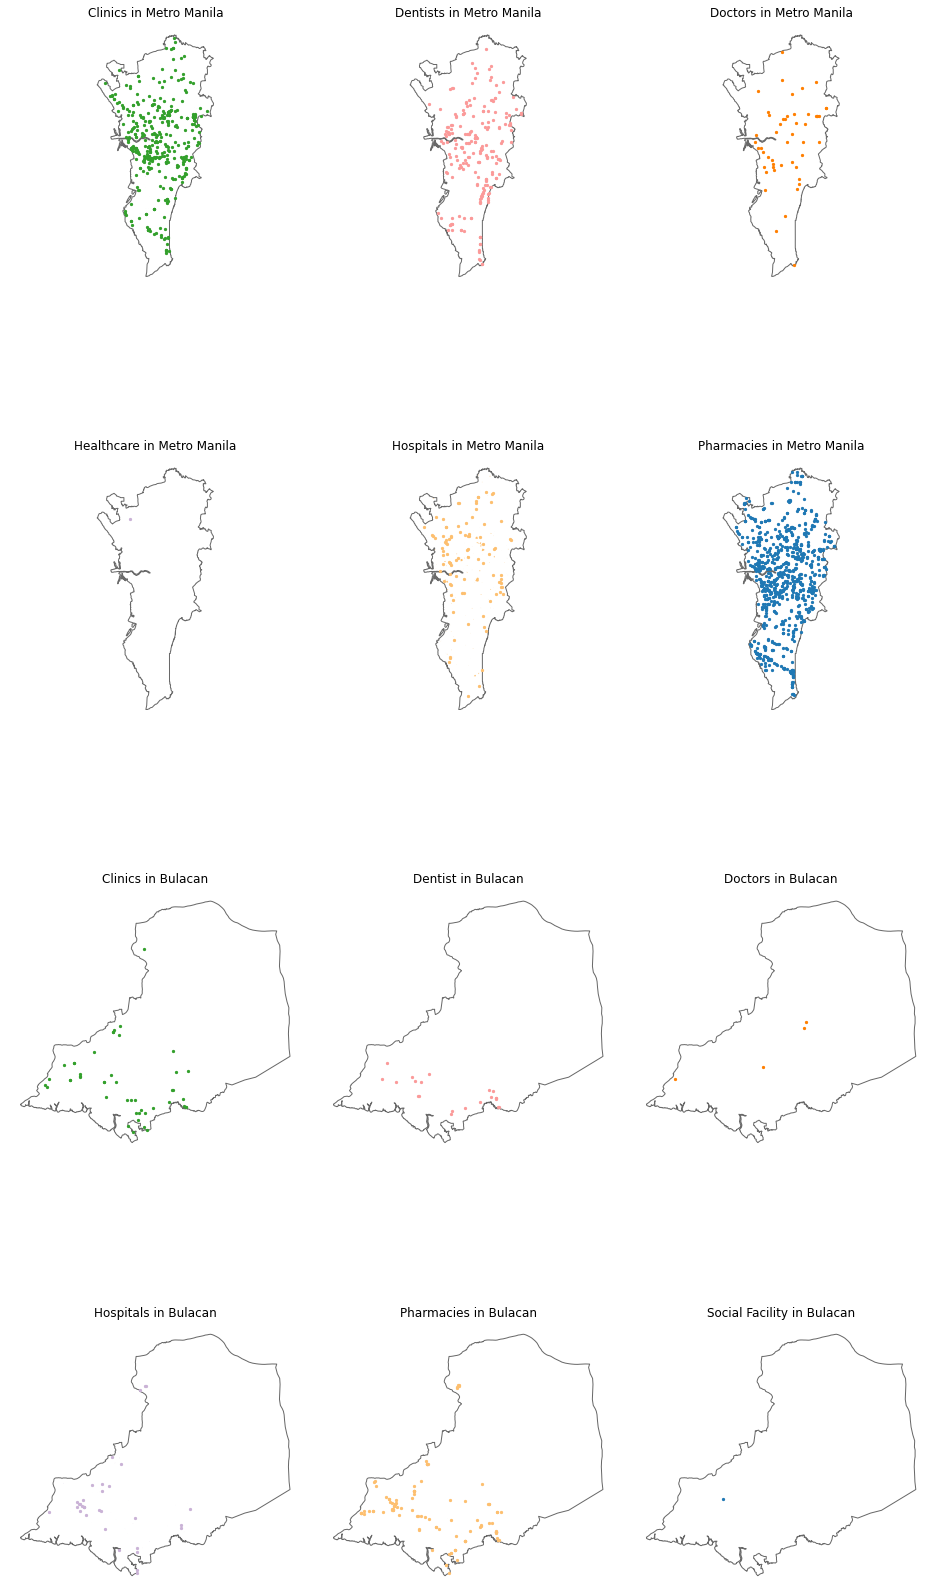

In [130]:
fig, axs = plt.subplots(4, 3)

mm = ph[ph.NAME_1=="Metropolitan Manila"]

mm.plot(ax=axs[0, 0], color='white', edgecolor='dimgray')
mm_clinic = gpd.sjoin(healthsites[healthsites.amenity == "clinic"], mm, op='within')
mm_clinic.plot(ax=axs[0, 0], color = "#33a02c",markersize=5)
axs[0, 0].set_title('Clinics in Metro Manila')
axs[0, 0].axis('off')

mm.plot(ax=axs[0, 1], color='white', edgecolor='dimgray')
mm_dentist = gpd.sjoin(healthsites[healthsites.amenity == "dentist"], mm, op='within')
mm_dentist.plot(ax=axs[0, 1], color = "#fb9a99",markersize=5)
axs[0, 1].set_title('Dentists in Metro Manila')
axs[0, 1].axis('off')

mm.plot(ax=axs[0, 2], color='white', edgecolor='dimgray')
mm_doctors = gpd.sjoin(healthsites[healthsites.amenity == "doctors"], mm, op='within')
mm_doctors.plot(ax=axs[0, 2], color = "#ff7f00",markersize=5)
axs[0, 2].set_title('Doctors in Metro Manila')
axs[0, 2].axis('off')

mm.plot(ax=axs[1, 0], color='white', edgecolor='dimgray')
mm_healthcare = gpd.sjoin(healthsites[healthsites.amenity == "healthcare"], mm, op='within')
mm_healthcare.plot(ax=axs[1, 0], color = "#cab2d6",markersize=5)
axs[1, 0].set_title('Healthcare in Metro Manila')
axs[1, 0].axis('off')

mm.plot(ax=axs[1, 1], color='white', edgecolor='dimgray')
mm_hospital = gpd.sjoin(healthsites[healthsites.amenity == "hospital"], mm, op='within')
mm_hospital.plot(ax=axs[1, 1], color = "#fdbf6f",markersize=5)
axs[1, 1].set_title('Hospitals in Metro Manila')
axs[1, 1].axis('off')

mm.plot(ax=axs[1, 2], color='white', edgecolor='dimgray')
mm_pharmacy = gpd.sjoin(healthsites[healthsites.amenity == "pharmacy"], mm, op='within')
mm_pharmacy.plot(ax=axs[1, 2], color = "#1f78b4",markersize=5)
axs[1, 2].set_title('Pharmacies in Metro Manila')
axs[1, 2].axis('off')

bulacan = ph[ph.NAME_1=="Bulacan"]

bulacan.plot(ax=axs[2, 0], color='white', edgecolor='dimgray')
bulacan_clinic = gpd.sjoin(healthsites[healthsites.amenity == "clinic"], bulacan, op='within')
bulacan_clinic.plot(ax=axs[2, 0], color = "#33a02c",markersize=5)
axs[2, 0].set_title('Clinics in Bulacan')
axs[2, 0].axis('off')

bulacan.plot(ax=axs[2, 1], color='white', edgecolor='dimgray')
bulacan_dentist = gpd.sjoin(healthsites[healthsites.amenity == "dentist"], bulacan, op='within')
bulacan_dentist.plot(ax=axs[2, 1], color = "#fb9a99",markersize=5)
axs[2, 1].set_title('Dentist in Bulacan')
axs[2, 1].axis('off')

bulacan.plot(ax=axs[2, 2], color='white', edgecolor='dimgray')
bulacan_doctors = gpd.sjoin(healthsites[healthsites.amenity == "doctors"], bulacan, op='within')
bulacan_doctors.plot(ax=axs[2, 2], color = "#ff7f00",markersize=5)
axs[2, 2].set_title('Doctors in Bulacan')
axs[2, 2].axis('off')

bulacan.plot(ax=axs[3, 0], color='white', edgecolor='dimgray')
bulacan_hospital = gpd.sjoin(healthsites[healthsites.amenity == "hospital"], bulacan, op='within')
bulacan_hospital.plot(ax=axs[3, 0], color = "#cab2d6",markersize=5)
axs[3, 0].set_title('Hospitals in Bulacan')
axs[3, 0].axis('off')

bulacan.plot(ax=axs[3, 1], color='white', edgecolor='dimgray')
bulacan_pharmacy = gpd.sjoin(healthsites[healthsites.amenity == "pharmacy"], bulacan, op='within')
bulacan_pharmacy.plot(ax=axs[3, 1], color = "#fdbf6f",markersize=5)
axs[3, 1].set_title('Pharmacies in Bulacan')
axs[3, 1].axis('off')

bulacan.plot(ax=axs[3, 2], color='white', edgecolor='dimgray')
bulacan_social_facility = gpd.sjoin(healthsites[healthsites.amenity == "social_facility"], bulacan, op='within')
bulacan_social_facility.plot(ax=axs[3, 2], color = "#1f78b4",markersize=5)
axs[3, 2].set_title('Social Facility in Bulacan')
axs[3, 2].axis('off')

fig.tight_layout()
fig.set_size_inches(15,25)
fig.savefig('Health-related_Amenities(NCR_Bulacan)V1.png')

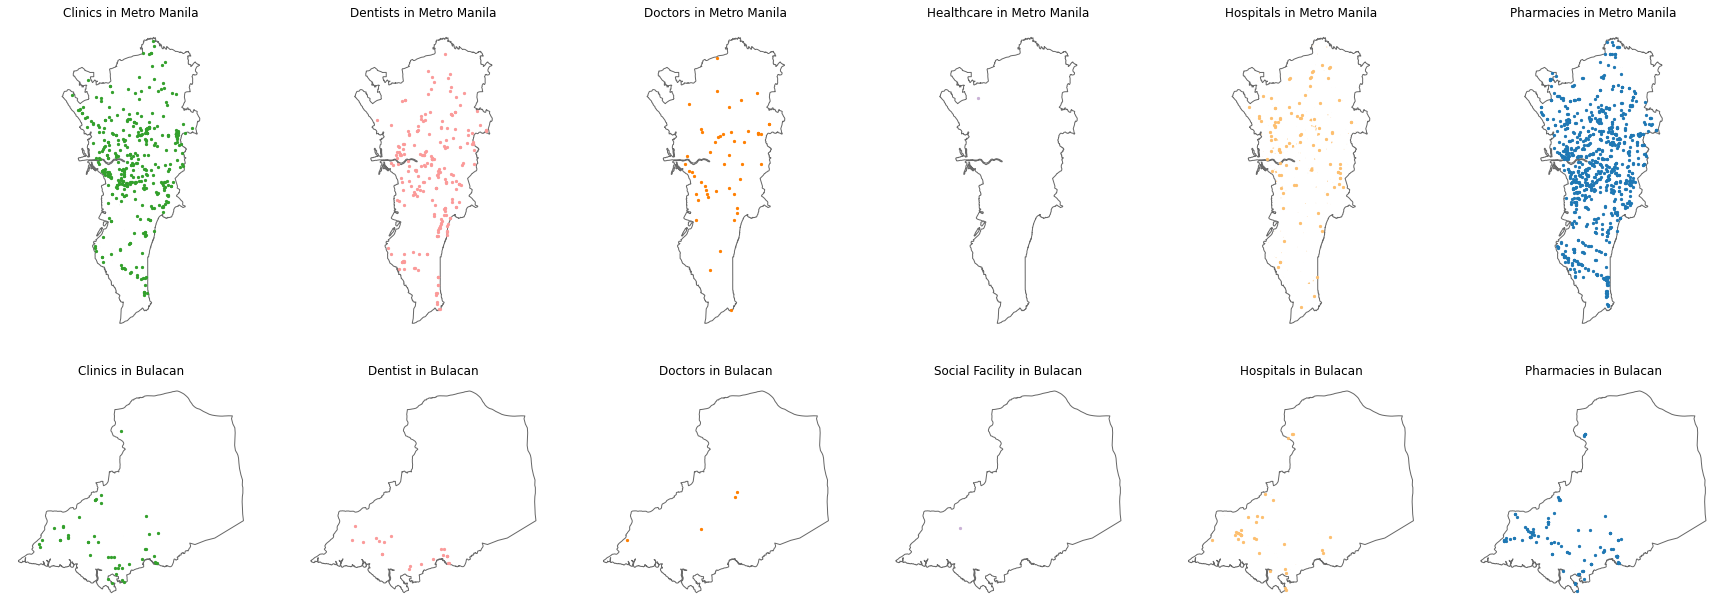

In [131]:
fig, axs = plt.subplots(2, 6)

mm = ph[ph.NAME_1=="Metropolitan Manila"]

mm.plot(ax=axs[0, 0], color='white', edgecolor='dimgray')
mm_clinic = gpd.sjoin(healthsites[healthsites.amenity == "clinic"], mm, op='within')
mm_clinic.plot(ax=axs[0, 0], color = "#33a02c",markersize=5)
axs[0, 0].set_title('Clinics in Metro Manila')
axs[0, 0].axis('off')

mm.plot(ax=axs[0, 1], color='white', edgecolor='dimgray')
mm_dentist = gpd.sjoin(healthsites[healthsites.amenity == "dentist"], mm, op='within')
mm_dentist.plot(ax=axs[0, 1], color = "#fb9a99",markersize=5)
axs[0, 1].set_title('Dentists in Metro Manila')
axs[0, 1].axis('off')

mm.plot(ax=axs[0, 2], color='white', edgecolor='dimgray')
mm_doctors = gpd.sjoin(healthsites[healthsites.amenity == "doctors"], mm, op='within')
mm_doctors.plot(ax=axs[0, 2], color = "#ff7f00",markersize=5)
axs[0, 2].set_title('Doctors in Metro Manila')
axs[0, 2].axis('off')

mm.plot(ax=axs[0, 3], color='white', edgecolor='dimgray')
mm_healthcare = gpd.sjoin(healthsites[healthsites.amenity == "healthcare"], mm, op='within')
mm_healthcare.plot(ax=axs[0, 3], color = "#cab2d6",markersize=5)
axs[0, 3].set_title('Healthcare in Metro Manila')
axs[0, 3].axis('off')

mm.plot(ax=axs[0, 4], color='white', edgecolor='dimgray')
mm_hospital = gpd.sjoin(healthsites[healthsites.amenity == "hospital"], mm, op='within')
mm_hospital.plot(ax=axs[0, 4], color = "#fdbf6f",markersize=5)
axs[0, 4].set_title('Hospitals in Metro Manila')
axs[0, 4].axis('off')

mm.plot(ax=axs[0, 5], color='white', edgecolor='dimgray')
mm_pharmacy = gpd.sjoin(healthsites[healthsites.amenity == "pharmacy"], mm, op='within')
mm_pharmacy.plot(ax=axs[0, 5], color = "#1f78b4",markersize=5)
axs[0, 5].set_title('Pharmacies in Metro Manila')
axs[0, 5].axis('off')

bulacan = ph[ph.NAME_1=="Bulacan"]

bulacan.plot(ax=axs[1, 0], color='white', edgecolor='dimgray')
bulacan_clinic = gpd.sjoin(healthsites[healthsites.amenity == "clinic"], bulacan, op='within')
bulacan_clinic.plot(ax=axs[1, 0], color = "#33a02c",markersize=5)
axs[1, 0].set_title('Clinics in Bulacan')
axs[1, 0].axis('off')

bulacan.plot(ax=axs[1, 1], color='white', edgecolor='dimgray')
bulacan_dentist = gpd.sjoin(healthsites[healthsites.amenity == "dentist"], bulacan, op='within')
bulacan_dentist.plot(ax=axs[1, 1], color = "#fb9a99",markersize=5)
axs[1, 1].set_title('Dentist in Bulacan')
axs[1, 1].axis('off')

bulacan.plot(ax=axs[1, 2], color='white', edgecolor='dimgray')
bulacan_doctors = gpd.sjoin(healthsites[healthsites.amenity == "doctors"], bulacan, op='within')
bulacan_doctors.plot(ax=axs[1, 2], color = "#ff7f00",markersize=5)
axs[1, 2].set_title('Doctors in Bulacan')
axs[1, 2].axis('off')

bulacan.plot(ax=axs[1, 3], color='white', edgecolor='dimgray')
bulacan_social_facility = gpd.sjoin(healthsites[healthsites.amenity == "social_facility"], bulacan, op='within')
bulacan_social_facility.plot(ax=axs[1, 3], color = "#cab2d6",markersize=5)
axs[1, 3].set_title('Social Facility in Bulacan')
axs[1, 3].axis('off')

bulacan.plot(ax=axs[1, 4], color='white', edgecolor='dimgray')
bulacan_hospital = gpd.sjoin(healthsites[healthsites.amenity == "hospital"], bulacan, op='within')
bulacan_hospital.plot(ax=axs[1, 4], color = "#fdbf6f",markersize=5)
axs[1, 4].set_title('Hospitals in Bulacan')
axs[1, 4].axis('off')

bulacan.plot(ax=axs[1, 5], color='white', edgecolor='dimgray')
bulacan_pharmacy = gpd.sjoin(healthsites[healthsites.amenity == "pharmacy"], bulacan, op='within')
bulacan_pharmacy.plot(ax=axs[1, 5], color = "#1f78b4",markersize=5)
axs[1, 5].set_title('Pharmacies in Bulacan')
axs[1, 5].axis('off')


fig.tight_layout()
fig.set_size_inches(25,10)
fig.savefig('Health-related_Amenities(NCR_Bulacan)V2.png')